In [ ]:
import pandas as pd

# Load the Cisco stock data from the provided CSV file
file_path = 'CSCO_stock_data.csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
stock_data.head()


,Date,Open,High,Low,Close,Volume
0,2006-01-03 00:00:00-05:00,11.484047,11.670888,11.464029,11.644197,55426000
1,2006-01-04 00:00:00-05:00,11.664215,11.964496,11.650869,11.911113,80408900
2,2006-01-05 00:00:00-05:00,11.971171,12.331507,11.964498,12.244760,118575500
3,2006-01-06 00:00:00-05:00,12.351521,12.598417,12.324828,12.525016,122446000
4,2006-01-09 00:00:00-05:00,12.658474,12.751895,12.625110,12.718530,78592600


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4716 non-null   object 
 1   Open    4716 non-null   float64
 2   High    4716 non-null   float64
 3   Low     4716 non-null   float64
 4   Close   4716 non-null   float64
 5   Volume  4716 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 221.2+ KB


In [ ]:
# Clean the 'Date' column by removing the time zone and converting to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'].str.split(' ').str[0])

# Check for missing values in the dataset
missing_values = stock_data.isnull().sum()

# Display cleaned data and missing value summary
stock_data.head(), missing_values


(        Date       Open       High        Low      Close     Volume
 0 2006-01-03  11.484047  11.670888  11.464029  11.644197   55426000
 1 2006-01-04  11.664215  11.964496  11.650869  11.911113   80408900
 2 2006-01-05  11.971171  12.331507  11.964498  12.244760  118575500
 3 2006-01-06  12.351521  12.598417  12.324828  12.525016  122446000
 4 2006-01-09  12.658474  12.751895  12.625110  12.718530   78592600,
 Date      0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 dtype: int64)

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,2006-01-03,11.484047,11.670888,11.464029,11.644197,55426000
1,2006-01-04,11.664215,11.964496,11.650869,11.911113,80408900
2,2006-01-05,11.971171,12.331507,11.964498,12.244760,118575500
3,2006-01-06,12.351521,12.598417,12.324828,12.525016,122446000
4,2006-01-09,12.658474,12.751895,12.625110,12.718530,78592600


In [ ]:
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


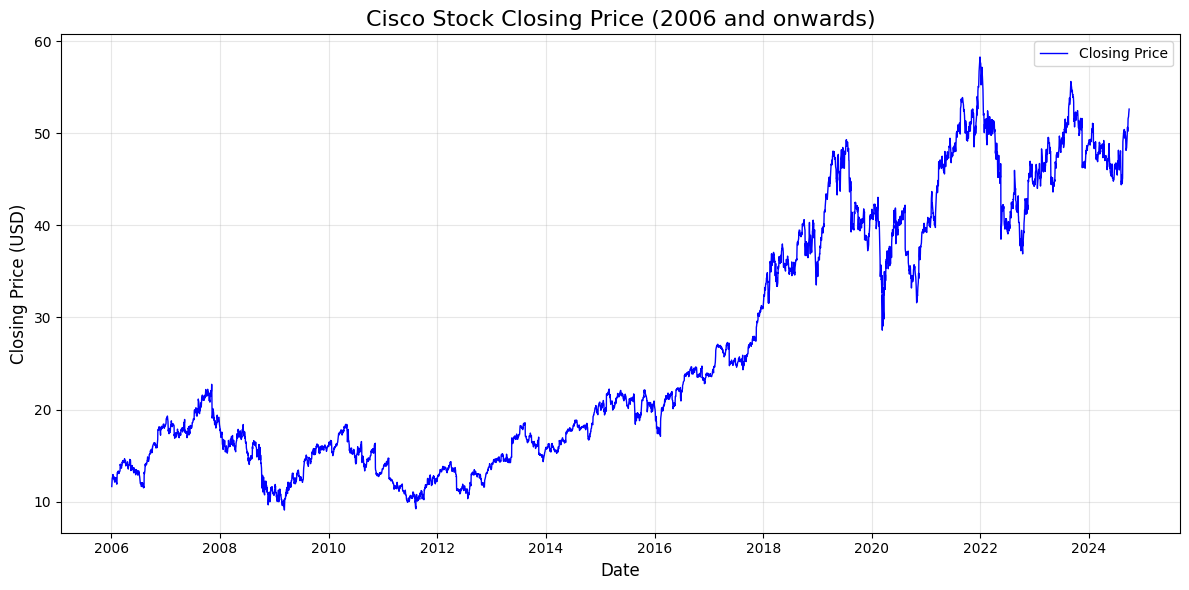

In [ ]:
import matplotlib.pyplot as plt

# Plot the stock's closing price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue', linewidth=1)
plt.title('Cisco Stock Closing Price (2006 and onwards)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


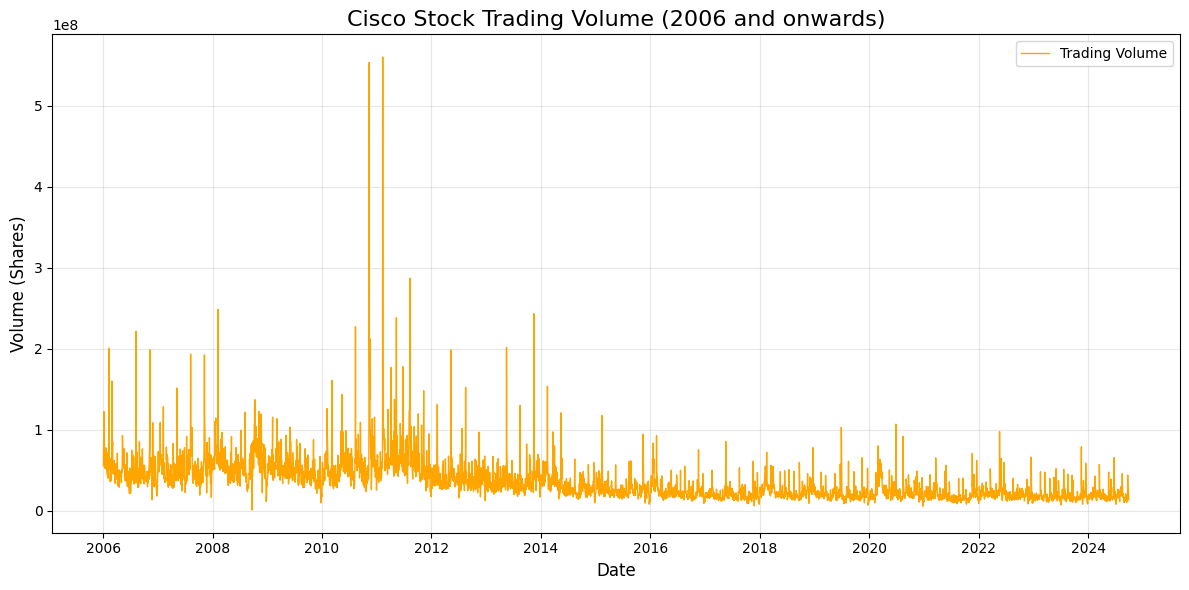

In [ ]:
# Calculate daily price range (High - Low)
stock_data['Price Range'] = stock_data['High'] - stock_data['Low']

# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Volume'], label='Trading Volume', color='orange', linewidth=1)
plt.title('Cisco Stock Trading Volume (2006 and onwards)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume (Shares)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



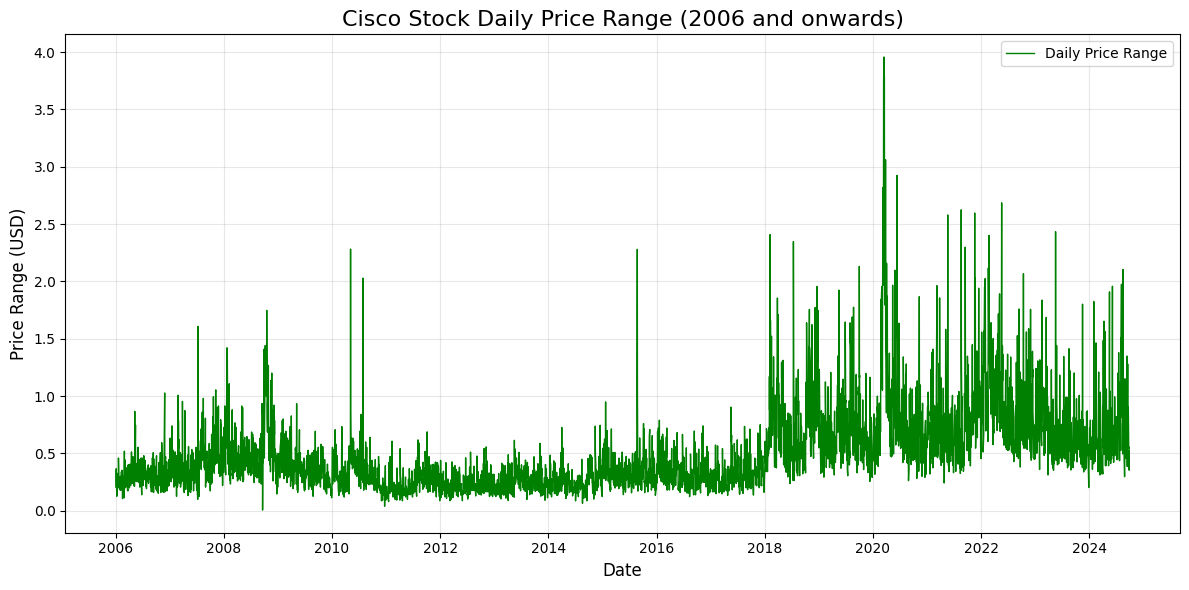

In [ ]:
# Plot the daily price range over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Price Range'], label='Daily Price Range', color='green', linewidth=1)
plt.title('Cisco Stock Daily Price Range (2006 and onwards)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Range (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


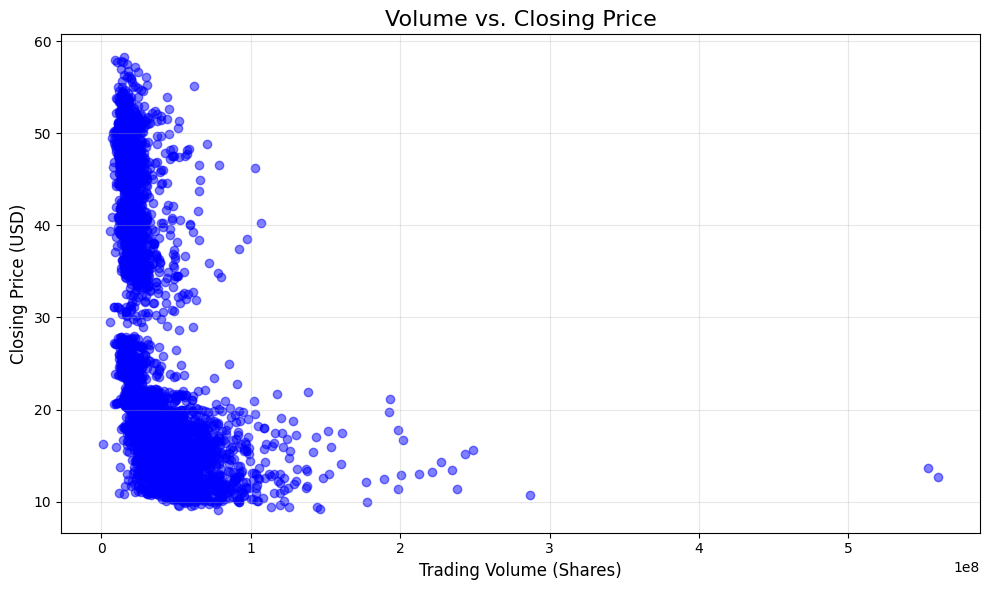

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Volume vs Closing Price
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volume'], stock_data['Close'], alpha=0.5, color='blue')
plt.title('Volume vs. Closing Price', fontsize=16)
plt.xlabel('Trading Volume (Shares)', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



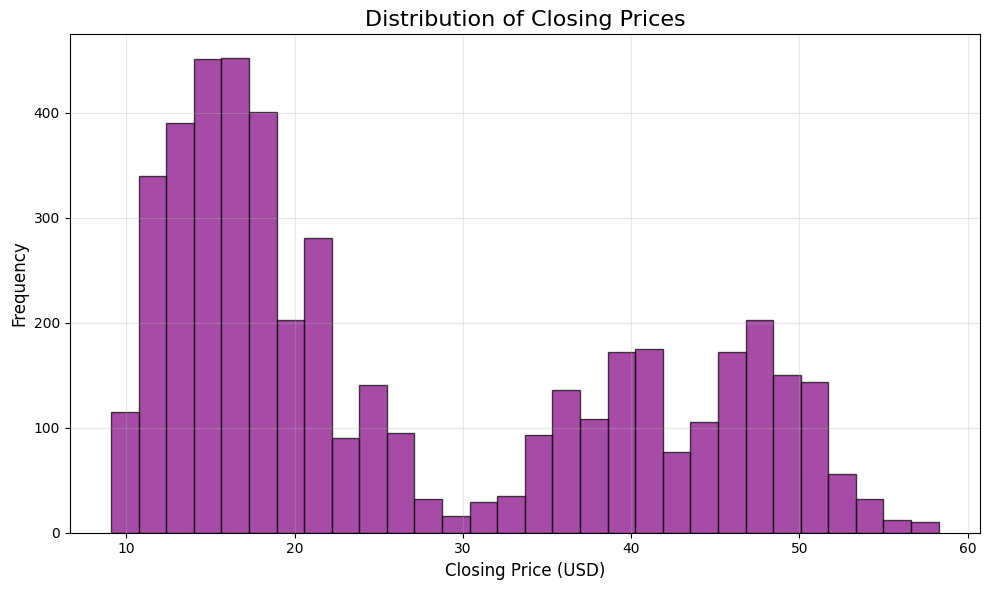

In [ ]:
import matplotlib.pyplot as plt

# Histogram for Closing Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribution of Closing Prices', fontsize=16)
plt.xlabel('Closing Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


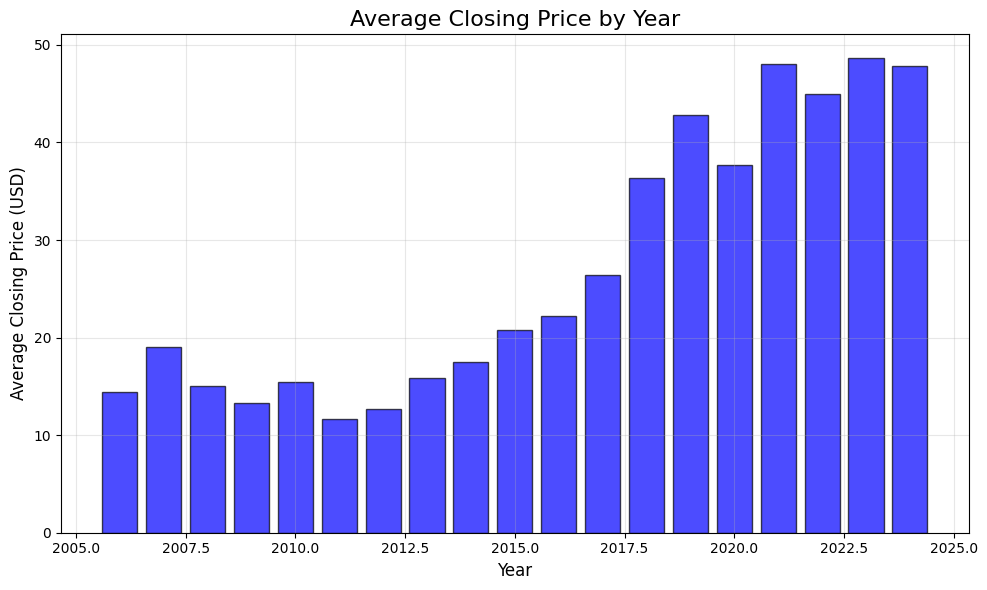

In [ ]:
import matplotlib.pyplot as plt

# Extract the year from the Date column
stock_data['Year'] = stock_data['Date'].dt.year

# Aggregate data by year
yearly_data = stock_data.groupby('Year').agg({
    'Close': 'mean',
    'Volume': 'mean',
    'Price Range': 'mean'
}).reset_index()

# Plot average closing prices by year
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['Close'], color='blue', alpha=0.7, edgecolor='black')
plt.title('Average Closing Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




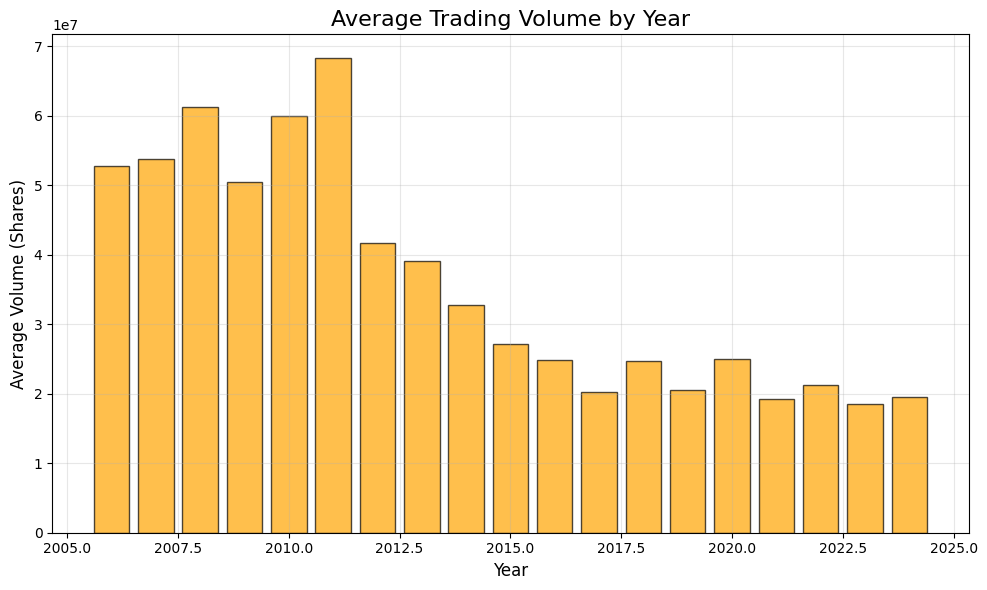

In [ ]:
# Plot average trading volume by year
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['Volume'], color='orange', alpha=0.7, edgecolor='black')
plt.title('Average Trading Volume by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Volume (Shares)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



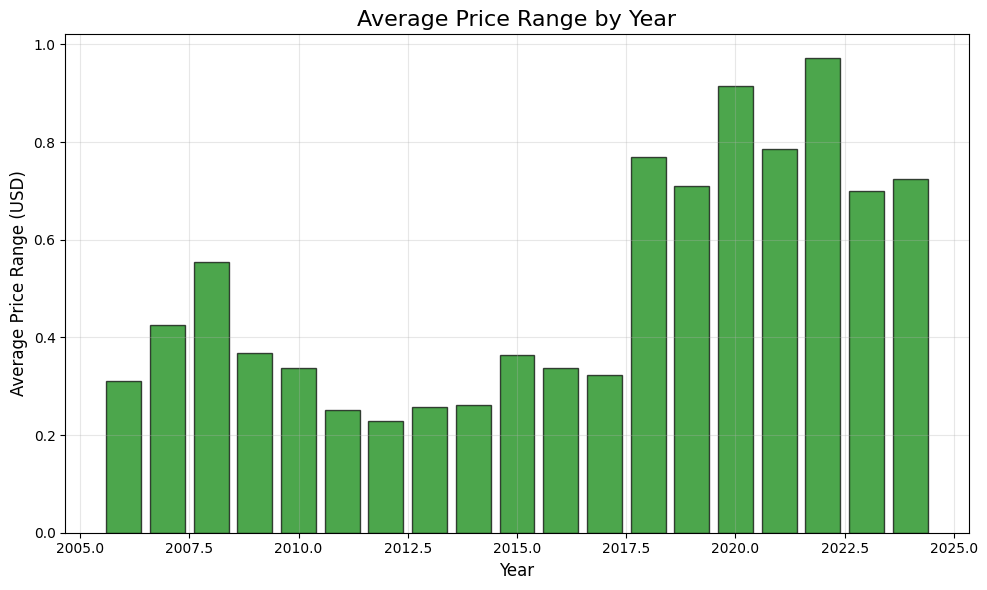

In [ ]:
# Plot average price range by year
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['Price Range'], color='green', alpha=0.7, edgecolor='black')
plt.title('Average Price Range by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price Range (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Price Range,Year
0,2006-01-03,11.484047,11.670888,11.464029,11.644197,55426000,0.206859,2006
1,2006-01-04,11.664215,11.964496,11.650869,11.911113,80408900,0.313627,2006
2,2006-01-05,11.971171,12.331507,11.964498,12.244760,118575500,0.367009,2006
3,2006-01-06,12.351521,12.598417,12.324828,12.525016,122446000,0.273588,2006
4,2006-01-09,12.658474,12.751895,12.625110,12.718530,78592600,0.126785,2006


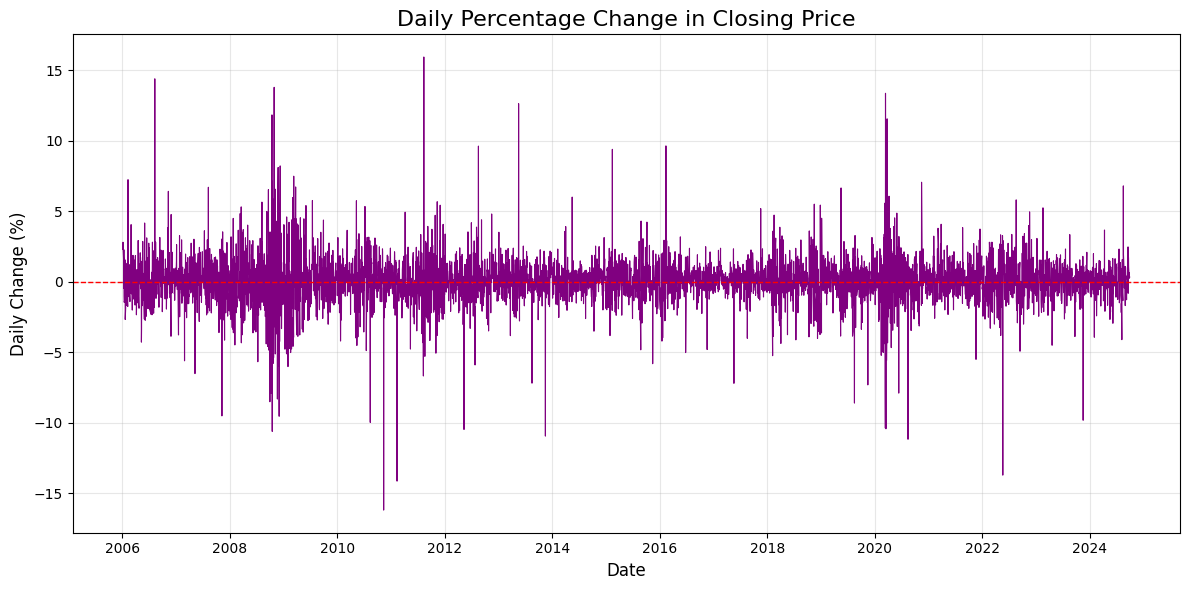

In [ ]:
import matplotlib.pyplot as plt

# Calculate daily percentage change
stock_data['Daily Change (%)'] = stock_data['Close'].pct_change() * 100

# Plot daily percentage change as a time series
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Daily Change (%)'], color='purple', linewidth=0.8)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0%
plt.title('Daily Percentage Change in Closing Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Change (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Price Range,Year,Daily Change (%)
0,2006-01-03,11.484047,11.670888,11.464029,11.644197,55426000,0.206859,2006,NaN
1,2006-01-04,11.664215,11.964496,11.650869,11.911113,80408900,0.313627,2006,2.292260
2,2006-01-05,11.971171,12.331507,11.964498,12.244760,118575500,0.367009,2006,2.801139
3,2006-01-06,12.351521,12.598417,12.324828,12.525016,122446000,0.273588,2006,2.288785
4,2006-01-09,12.658474,12.751895,12.625110,12.718530,78592600,0.126785,2006,1.545019


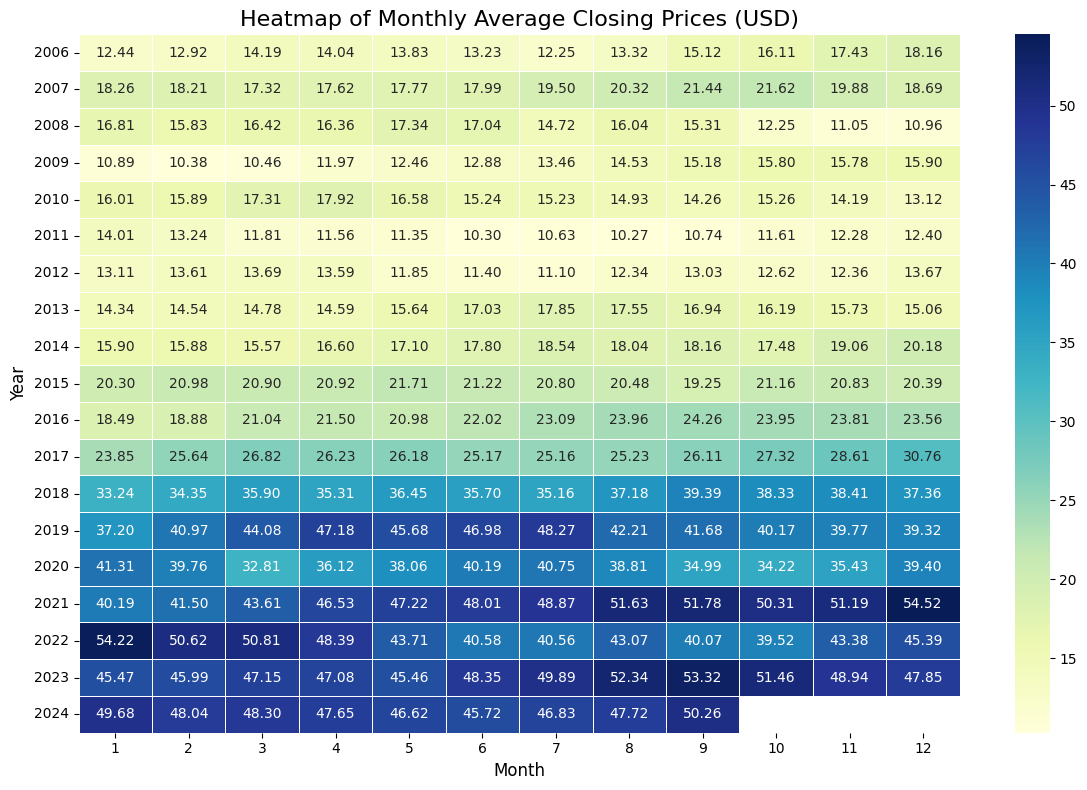

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for date manipulation

# Convert 'Date' column to datetime if it's not already
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set 'Date' column as index
stock_data = stock_data.set_index('Date')

# Extract Year and Month from Date
stock_data['Year'] = stock_data.index.year
stock_data['Month'] = stock_data.index.month

# Calculate monthly average closing prices or volumes
monthly_avg = stock_data.groupby(['Year', 'Month']).agg({
    'Close': 'mean',  # You can also change this to 'Volume' for trading volume
}).reset_index()

# Pivot the data for a heatmap (correcting the pivot function)
monthly_avg_pivot = monthly_avg.pivot(index='Year', columns='Month', values='Close')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Monthly Average Closing Prices (USD)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

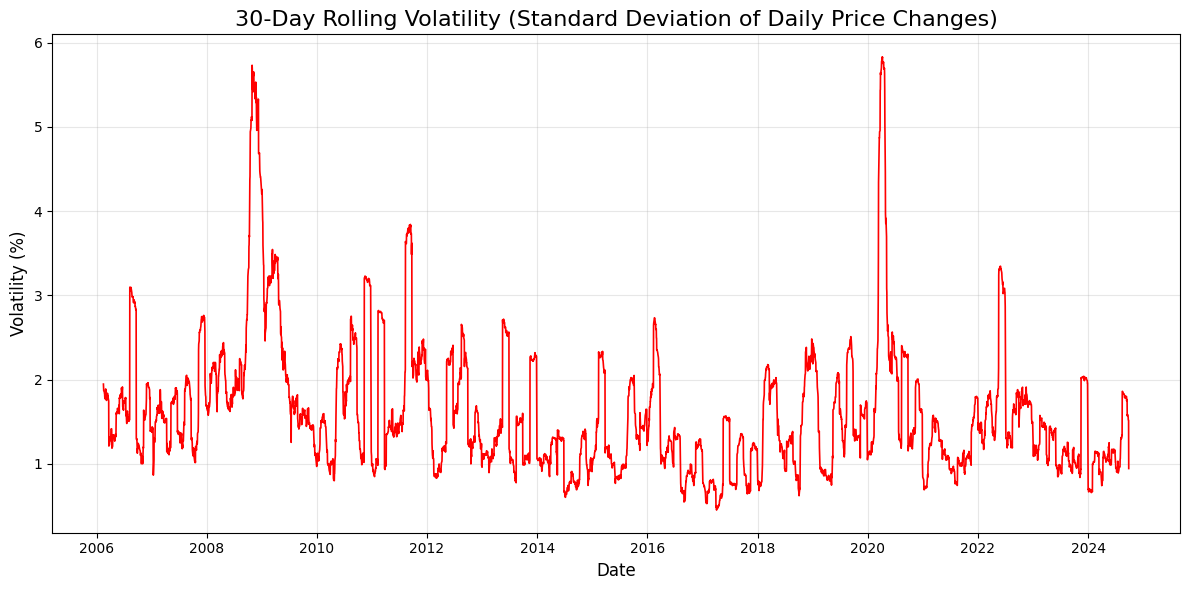

In [ ]:
# Calculate daily percentage change
stock_data['Daily Change (%)'] = stock_data['Close'].pct_change() * 100

# Compute rolling standard deviation (volatility) over a window, e.g., 30 days
rolling_volatility = stock_data['Daily Change (%)'].rolling(window=30).std()

# Plot the rolling volatility
plt.figure(figsize=(12, 6))
# Access the index of the DataFrame for plotting the x-axis instead of 'Date' column
plt.plot(stock_data.index, rolling_volatility, color='red', linewidth=1.2)
plt.title('30-Day Rolling Volatility (Standard Deviation of Daily Price Changes)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

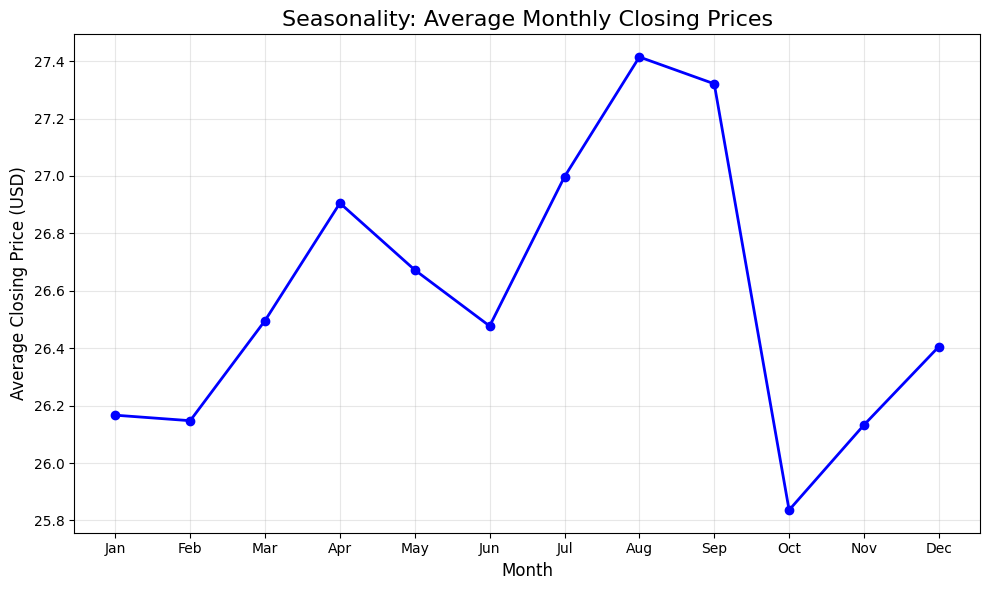

In [ ]:
# Extract month and calculate average closing price for each month across all years
monthly_avg_performance = stock_data.groupby('Month')['Close'].mean()

# Plot the seasonality based on monthly average closing prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_performance.index, monthly_avg_performance.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Seasonality: Average Monthly Closing Prices', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# **Insider Data**

In [ ]:
# Preprocessing the data
import pandas as pd

In [ ]:
data = pd.read_csv("CSCO_insider_data.csv")

In [ ]:
data.head()

,filing_date,company_name,ticker,insider_name,job_title,trade_type,price,quantity_traded,final_shares_owned,change_in_shares_owned,value_of_shares_traded
0,2006-01-04,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,ChiefAcctgOfcr",S,17.19,-7333.0,2789.0,-262.925780,-126054.27
1,2006-01-04,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,ChiefAcctgOfcr",S,17.19,-7291.0,2789.0,-261.419864,-125332.29
2,2006-01-04,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,ChiefAcctgOfcr",S,17.19,-7291.0,2789.0,-261.419864,-125332.29
3,2006-01-06,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,PrincAcctgOfcr",S,18.50,-30000.0,2789.0,-1075.654356,-555000.00
4,2006-02-10,CISCO SYSTEMS INC,CSCO,CHANDLER MARK D,"SVP,Legal Srvs,GenCnsl & Secty",S,19.95,-45000.0,82764.0,-54.371466,-897750.00


In [ ]:


# Load your data into a DataFrame (assuming it's already in a variable called 'data')
data['filing_date'] = pd.to_datetime(data['filing_date'])
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['quantity_traded'] = pd.to_numeric(data['quantity_traded'], errors='coerce')
data['value_of_shares_traded'] = pd.to_numeric(data['value_of_shares_traded'], errors='coerce')

# Check for missing values
data.isnull().sum()


,0
filing_date,0
company_name,0
ticker,0
insider_name,0
job_title,153
trade_type,0
price,0
quantity_traded,0
final_shares_owned,0
change_in_shares_owned,0


In [ ]:
# Fill missing job titles with a placeholder
data['job_title'] = data['job_title'].fillna('Unknown')


In [ ]:
data.isnull().sum()

,0
filing_date,0
company_name,0
ticker,0
insider_name,0
job_title,0
trade_type,0
price,0
quantity_traded,0
final_shares_owned,0
change_in_shares_owned,0


In [ ]:
data.head()

,filing_date,company_name,ticker,insider_name,job_title,trade_type,price,quantity_traded,final_shares_owned,change_in_shares_owned,value_of_shares_traded
0,2006-01-04,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,ChiefAcctgOfcr",S,17.19,-7333.0,2789.0,-262.925780,-126054.27
1,2006-01-04,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,ChiefAcctgOfcr",S,17.19,-7291.0,2789.0,-261.419864,-125332.29
2,2006-01-04,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,ChiefAcctgOfcr",S,17.19,-7291.0,2789.0,-261.419864,-125332.29
3,2006-01-06,CISCO SYSTEMS INC,CSCO,RAFAEL BETSY,"VP,CorpContrllr,PrincAcctgOfcr",S,18.50,-30000.0,2789.0,-1075.654356,-555000.00
4,2006-02-10,CISCO SYSTEMS INC,CSCO,CHANDLER MARK D,"SVP,Legal Srvs,GenCnsl & Secty",S,19.95,-45000.0,82764.0,-54.371466,-897750.00


In [ ]:
data.dtypes

,0
filing_date,datetime64[ns]
company_name,object
ticker,object
insider_name,object
job_title,object
trade_type,object
price,float64
quantity_traded,float64
final_shares_owned,float64
change_in_shares_owned,float64


In [ ]:
data.describe()

,filing_date,price,quantity_traded,final_shares_owned,change_in_shares_owned,value_of_shares_traded
count,1714,1714.000000,1.714000e+03,1.714000e+03,1714.000000,1.714000e+03
mean,2011-10-19 08:21:33.815635968,28.917474,-7.532738e+04,1.077047e+06,-inf,-1.919894e+06
min,2006-01-04 00:00:00,14.480000,-2.050000e+06,0.000000e+00,-inf,-4.983550e+07
25%,2006-12-01 00:00:00,21.857500,-5.000000e+04,1.227578e+05,-22.286982,-1.420937e+06
50%,2009-09-14 00:00:00,26.710000,-2.000000e+04,2.515560e+05,-6.029901,-5.186300e+05
75%,2015-06-19 00:00:00,30.000000,-6.300000e+03,9.625150e+05,-1.133100,-1.794982e+05
max,2024-09-12 00:00:00,59.690000,2.324000e+04,2.786584e+08,100.000000,5.574000e+05
std,NaN,9.567470,2.331519e+05,6.823116e+06,NaN,5.648031e+06


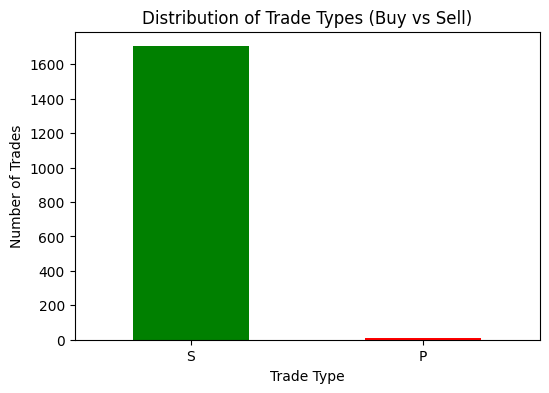

In [ ]:
# Count the number of trades by type (Buy or Sell)
trade_type_counts = data['trade_type'].value_counts()

# Plot the distribution of trade types
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
trade_type_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Trade Types (Buy vs Sell)')
plt.xlabel('Trade Type')
plt.ylabel('Number of Trades')
plt.xticks(rotation=0)
plt.show()


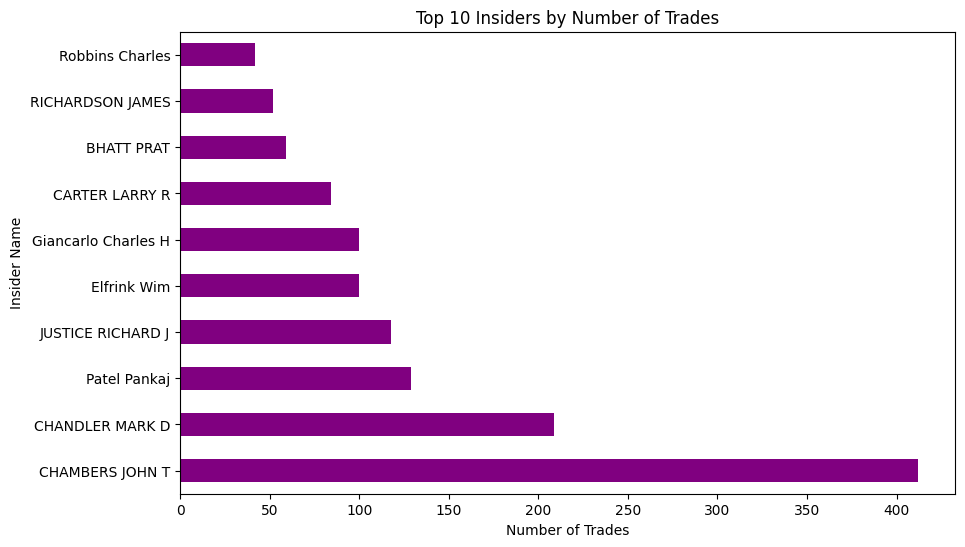

In [ ]:
# Count the number of trades by insider name
insider_trade_counts = data['insider_name'].value_counts()

# Plot the top insiders by number of trades
plt.figure(figsize=(10, 6))
insider_trade_counts.head(10).plot(kind='barh', color='purple')  # Show top 10 insiders
plt.title('Top 10 Insiders by Number of Trades')
plt.xlabel('Number of Trades')
plt.ylabel('Insider Name')
plt.show()


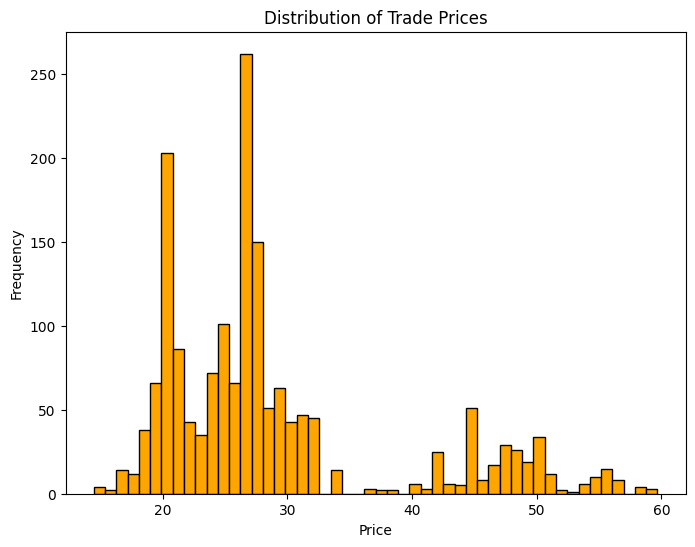

In [ ]:
# Plot histogram of trade prices
plt.figure(figsize=(8, 6))
data['price'].plot(kind='hist', bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Trade Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


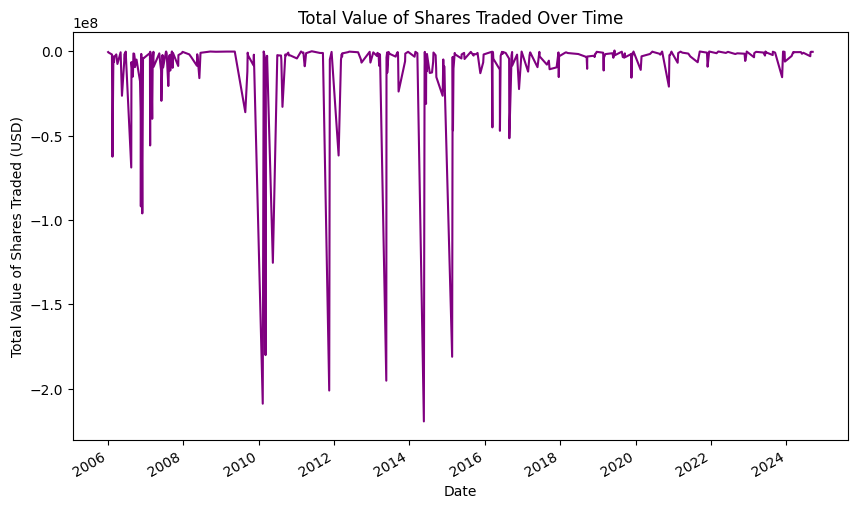

In [ ]:
# Group by filing_date and sum the value of shares traded
daily_traded_value = data.groupby('filing_date')['value_of_shares_traded'].sum()

# Plot the total value of shares traded over time
plt.figure(figsize=(10, 6))
daily_traded_value.plot(kind='line', color='purple')
plt.title('Total Value of Shares Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value of Shares Traded (USD)')
plt.show()


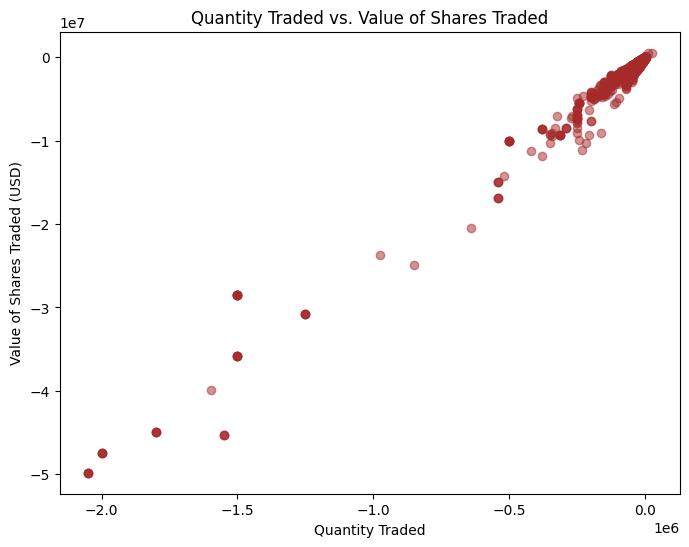

In [ ]:
# Scatter plot between quantity traded and value of shares traded
plt.figure(figsize=(8, 6))
plt.scatter(data['quantity_traded'], data['value_of_shares_traded'], color='brown', alpha=0.5)
plt.title('Quantity Traded vs. Value of Shares Traded')
plt.xlabel('Quantity Traded')
plt.ylabel('Value of Shares Traded (USD)')
plt.show()


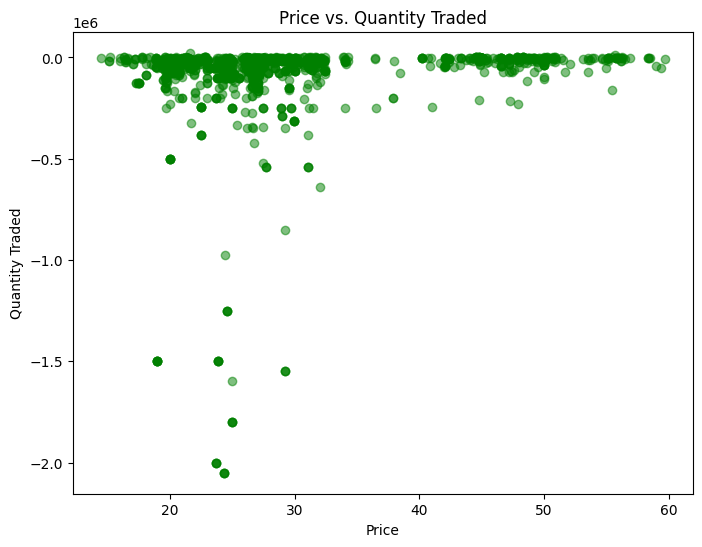

In [ ]:
# Scatter plot between price and quantity traded
plt.figure(figsize=(8, 6))
plt.scatter(data['price'], data['quantity_traded'], color='green', alpha=0.5)
plt.title('Price vs. Quantity Traded')
plt.xlabel('Price')
plt.ylabel('Quantity Traded')
plt.show()


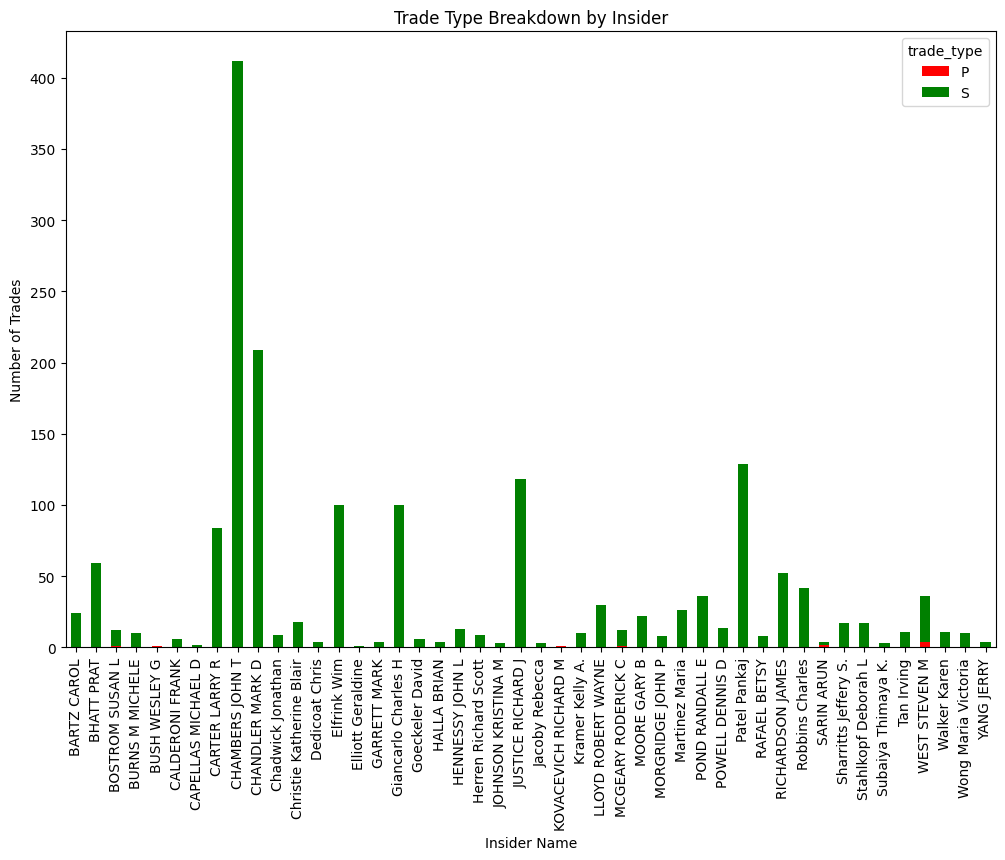

In [ ]:
# Count trade types by insider
insider_trade_counts = data.groupby(['insider_name', 'trade_type']).size().unstack()

# Plot the trade type breakdown by insider
insider_trade_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])
plt.title('Trade Type Breakdown by Insider')
plt.xlabel('Insider Name')
plt.ylabel('Number of Trades')
plt.xticks(rotation=90)
plt.show()


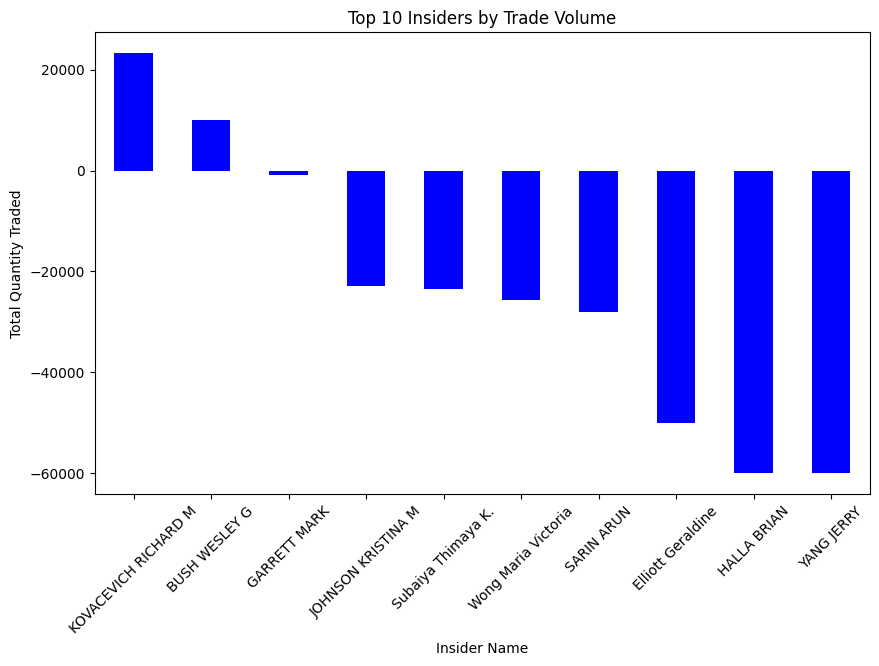

In [ ]:
# Calculate total trade volume for each insider
top_insiders = data.groupby('insider_name')['quantity_traded'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_insiders.plot(kind='bar', color='blue')
plt.title('Top 10 Insiders by Trade Volume')
plt.xlabel('Insider Name')
plt.ylabel('Total Quantity Traded')
plt.xticks(rotation=45)
plt.show()


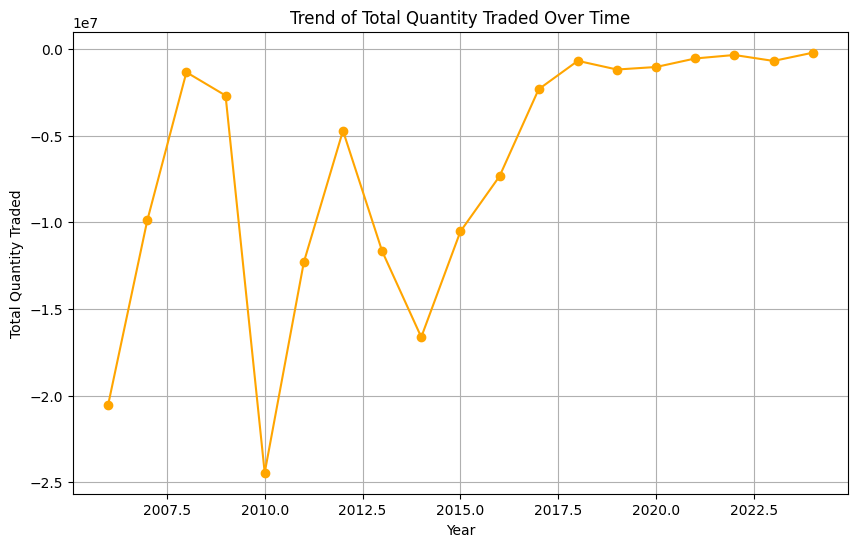

In [ ]:
# Group by year and count the number of trades
data['Year'] = data['filing_date'].dt.year
trades_per_year = data.groupby('Year')['quantity_traded'].sum()

# Plot
plt.figure(figsize=(10, 6))
trades_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Trend of Total Quantity Traded Over Time')
plt.xlabel('Year')
plt.ylabel('Total Quantity Traded')
plt.grid()
plt.show()


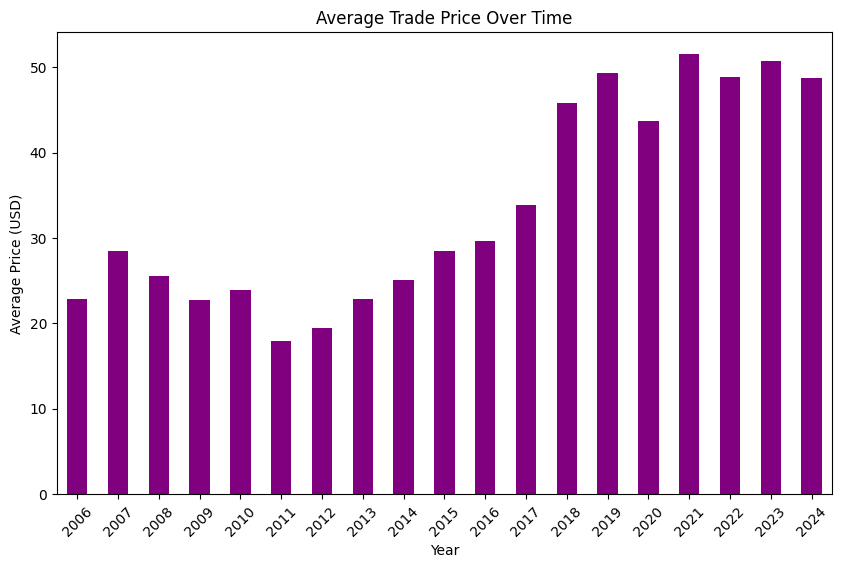

In [ ]:
# Calculate yearly average price
average_price_per_year = data.groupby('Year')['price'].mean()

# Plot
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind='bar', color='purple')
plt.title('Average Trade Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()


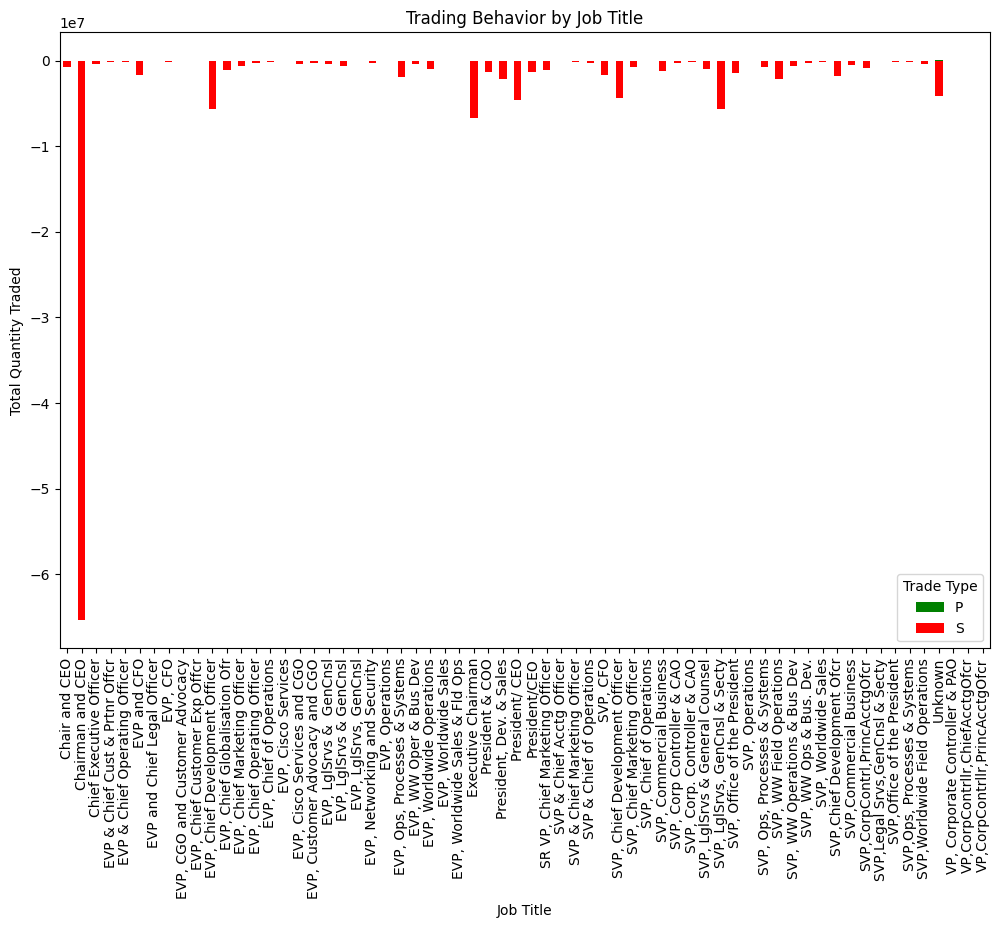

In [ ]:
# Group by job title and trade type
job_trade_behavior = data.groupby(['job_title', 'trade_type'])['quantity_traded'].sum().unstack()

# Plot
job_trade_behavior.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'red'])
plt.title('Trading Behavior by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Total Quantity Traded')
plt.xticks(rotation=90)
plt.legend(title='Trade Type')
plt.show()


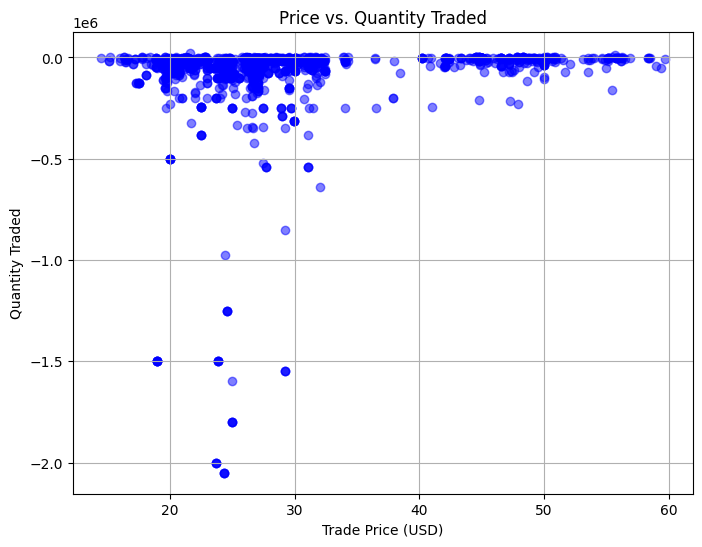

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['price'], data['quantity_traded'], alpha=0.5, color='blue')
plt.title('Price vs. Quantity Traded')
plt.xlabel('Trade Price (USD)')
plt.ylabel('Quantity Traded')
plt.grid()
plt.show()


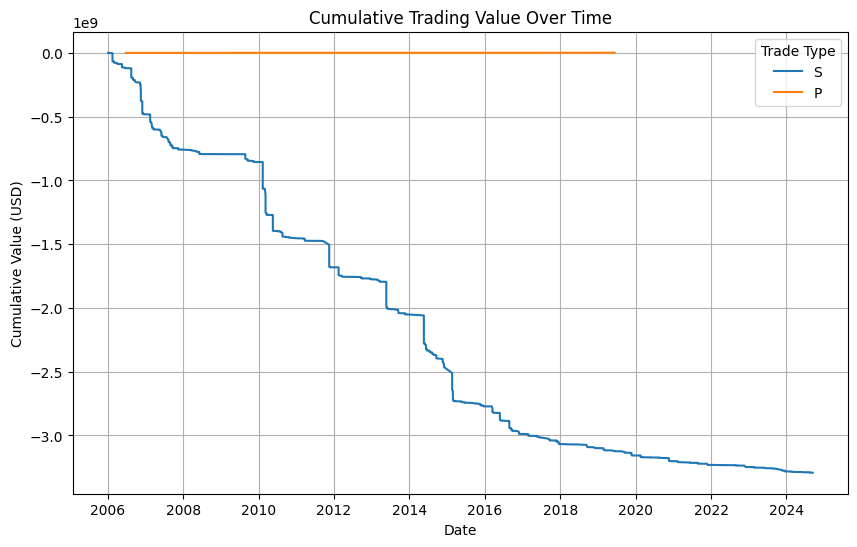

In [ ]:
# Cumulative sum by trade type
data['cumulative_value'] = data.groupby('trade_type')['value_of_shares_traded'].cumsum()

# Plot
plt.figure(figsize=(10, 6))
for trade_type in data['trade_type'].unique():
    subset = data[data['trade_type'] == trade_type]
    plt.plot(subset['filing_date'], subset['cumulative_value'], label=trade_type)

plt.title('Cumulative Trading Value Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Value (USD)')
plt.legend(title='Trade Type')
plt.grid()
plt.show()


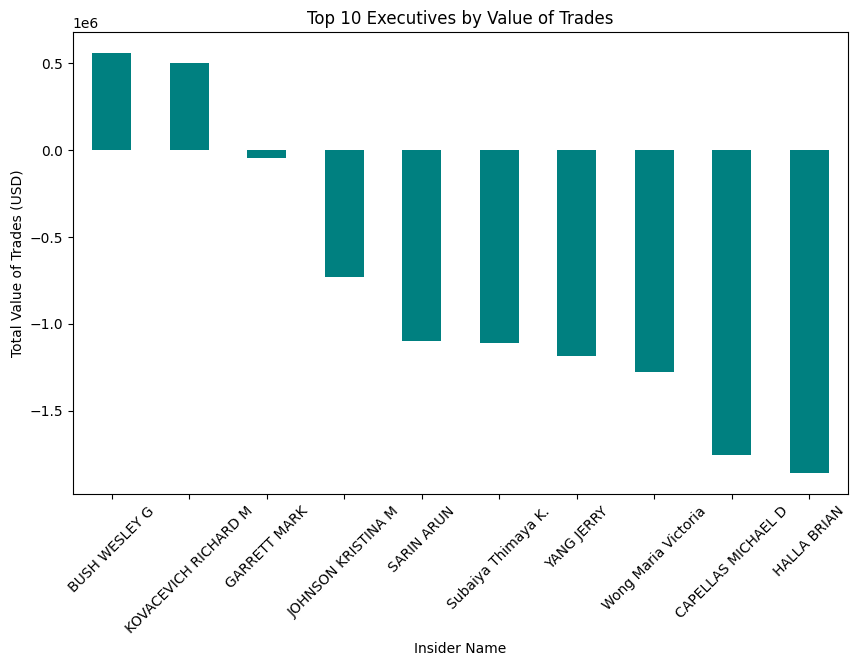

In [ ]:
# Calculate total value of trades by insider
top_trade_value = data.groupby('insider_name')['value_of_shares_traded'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_trade_value.plot(kind='bar', color='teal')
plt.title('Top 10 Executives by Value of Trades')
plt.xlabel('Insider Name')
plt.ylabel('Total Value of Trades (USD)')
plt.xticks(rotation=45)
plt.show()


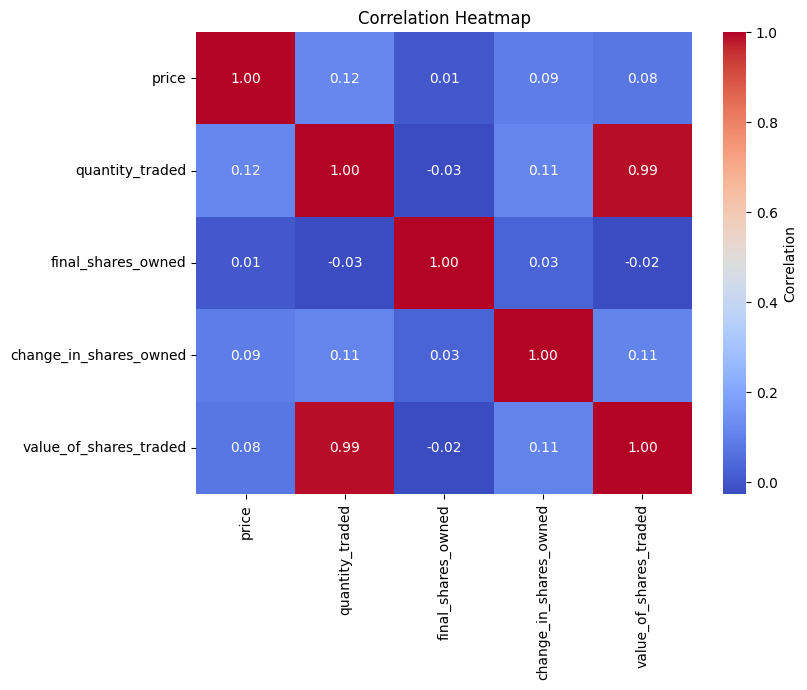

In [ ]:
# Compute correlation matrix
correlation_matrix = data[['price', 'quantity_traded', 'final_shares_owned', 'change_in_shares_owned', 'value_of_shares_traded']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()
